# Loan Approval System Documentation

The Loan Approval System aims to develop a classification model for predicting the eligibility of individuals to obtain a loan from a designated financial institution. This project involves implementing a classifier to assess whether a specific individual meets the criteria for loan approval.

## Project Overview

The primary objective of the Loan Approval System is to create a robust classification model that accurately determines whether an individual qualifies for a loan from a specified bank. This documentation outlines the key components and steps involved in building this classification system.

### Scope and Purpose

The scope of this project encompasses data collection, preprocessing, feature selection, model training, testing, and evaluation. The purpose is to establish a reliable and efficient model that enhances the decision-making process in the loan approval domain.

## Steps in the Loan Approval System

1. **Data Collection:**
   - Gather relevant data sets containing information pertinent to loan approval decisions.

2. **Data Preprocessing:**
   - Address issues such as inconsistent data types, misspelled attributes, and handling missing or duplicate values.

3. **Feature Selection:**
   - Define and refine the selection of feature variables that contribute to the model's accuracy.

4. **Model Training:**
   - Identify an appropriate classification model (e.g., KNN, Naive Bayes, Decision Tree) based on business requirements.
   - Train the model using a suitable training dataset.

5. **Model Testing:**
   - Evaluate the model's performance using a testing dataset to ensure reliability and accuracy.

6. **Prediction:**
   - Utilize the trained model for predicting the loan approval status of individuals.

7. **Documentation and Reporting:**
   - Compile documentation detailing the steps taken, methodologies applied, and outcomes achieved.
   - Present findings and model performance through reports and dashboards for stakeholders.

## Conclusion

The Loan Approval System serves as a pivotal tool for automating and optimizing the loan approval process. By adhering to the outlined steps and methodologies, this system aims to enhance decision-making efficiency and contribute to a more streamlined loan approval workflow.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Data Collection

This section of code will be designed to read and gather information about the dataset used.


In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Clear **NaN** values form the dataset

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

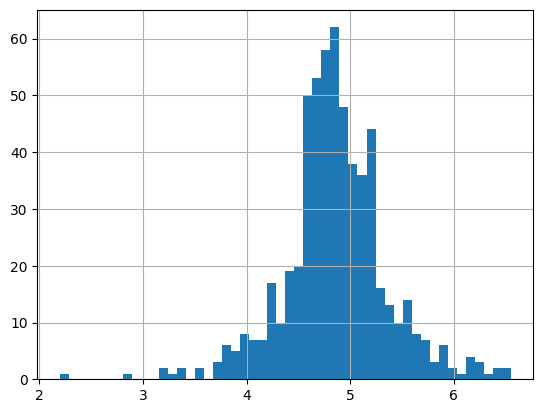

In [6]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=50)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

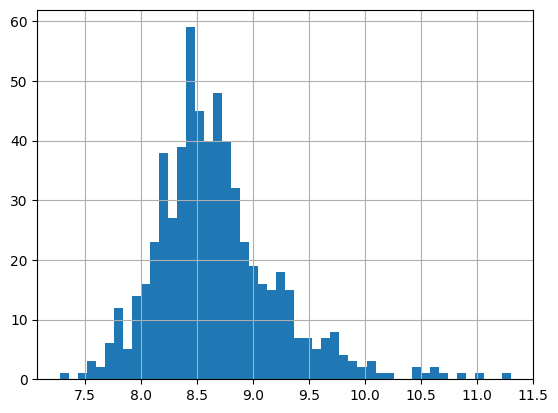

In [8]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df ["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins=50)

In [9]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["LoanAmount_log"] = np.log(df["LoanAmount"])

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [10]:
x = df.iloc[:, np.r_[1:5,9:11,13:15]].values
y = df.iloc[:, 12].values


Percent of missing gender is: 0.00%
Number of People who take a loan grouped by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

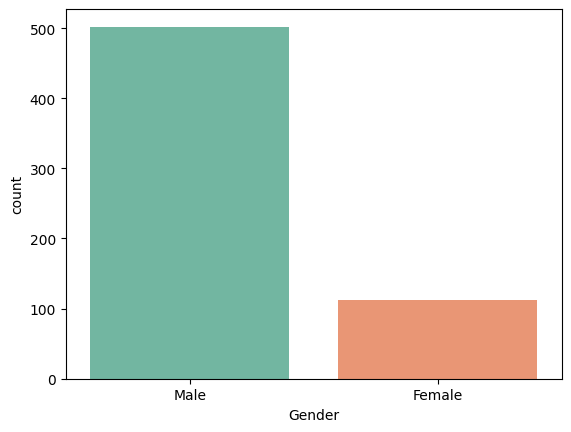

In [11]:
print(f"Percent of missing gender is: {df['Gender'].isna().sum() / df.shape[0] * 100:.2f}%")
print(f"Number of People who take a loan grouped by gender:\n{df['Gender'].value_counts()}")

sns.countplot(x="Gender", data=df, palette="Set2", hue="Gender", legend=False)

Number of People who take a loan as group by martial status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

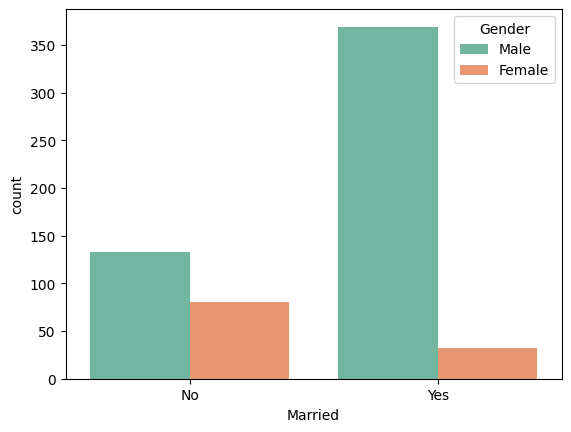

In [12]:
print(f"Number of People who take a loan as group by martial status:\n{df['Married'].value_counts()}")

sns.countplot(x="Married", data=df, palette="Set2", hue="Gender", legend=True)


Number of People who take a loan as group by dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

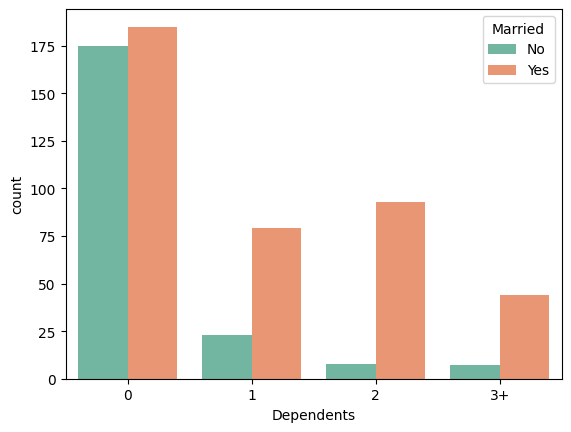

In [13]:
print(f"Number of People who take a loan as group by dependents:\n{df['Dependents'].value_counts()}")

sns.countplot(x="Dependents", data=df, palette="Set2", hue="Married", legend=True)

Number of People who take a loan as group by Self Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

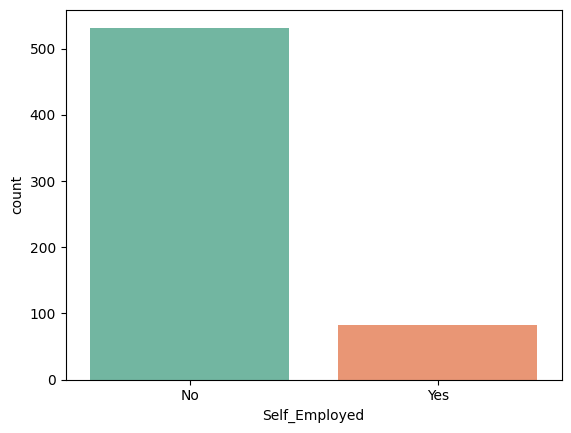

In [14]:
print(f"Number of People who take a loan as group by Self Employed:\n{df['Self_Employed'].value_counts()}")

sns.countplot(x="Self_Employed", data=df, palette="Set2", hue="Self_Employed", legend=False)


Number of People who take a loan as group by Loan Amount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

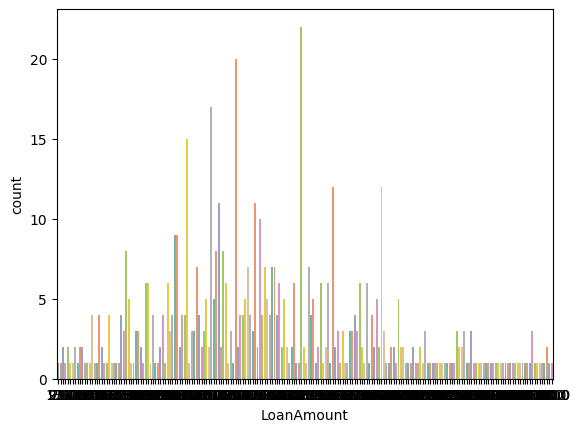

In [15]:
print(f"Number of People who take a loan as group by Loan Amount:\n{df['LoanAmount'].value_counts()}")

sns.countplot(x="LoanAmount", data=df, palette="Set2", hue="LoanAmount", legend=False)

Number of People who take a loan as group by Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

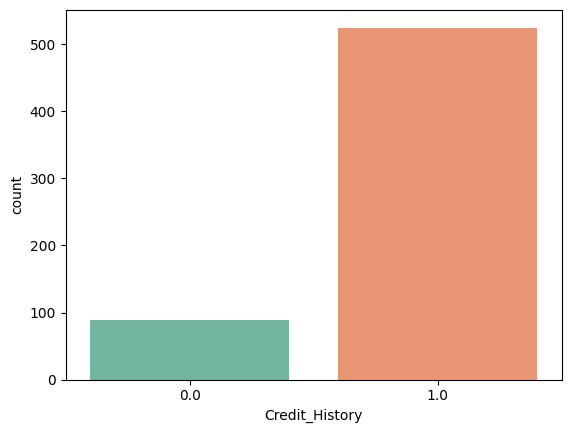

In [16]:
print(f"Number of People who take a loan as group by Credit History:\n{df['Credit_History'].value_counts()}")

sns.countplot(x="Credit_History", data=df, palette="Set2", hue="Credit_History", legend=False)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

labelencoder_x = LabelEncoder()

x_train

array([['Male', 'No', '0', ..., 1.0, 5.730099782973574, 12917.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.955827057601261, 7159.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.74493212836325, 4567.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

In [18]:
for i in range(5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])
    
x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])

x_train

array([[1, 0, 0, ..., 1.0, 5.730099782973574, 367],
       [1, 1, 0, ..., 1.0, 4.955827057601261, 295],
       [1, 1, 0, ..., 1.0, 4.74493212836325, 131],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 321],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 241],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 268]], dtype=object)

In [19]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [20]:
for i in range(5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])
    
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])  

x_test
    

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 126],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 46],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 153],
       ...,
       [0, 1, 0, ..., 1.0, 3.58351893845611, 12],
       [1, 1, 0, ..., 1.0, 5.135798437050262, 16],
       [1, 0, 0, ..., 1.0, 4.624972813284271, 74]], dtype=object)

In [21]:
y_test = labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [22]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [23]:
rf_csf = RandomForestClassifier()
rf_csf.fit(X=x_train, y=y_train)

RandomForestClassifier()

In [24]:
y_pred = rf_csf.predict(X=x_test)

print(f"Accuracy of random forest classification: {metrics.accuracy_score(y_pred=y_pred, y_true=y_test)*100}%")

Accuracy of random forest classification: 78.37837837837837%


In [25]:
nb_csf = GaussianNB()
nb_csf.fit(X=x_train, y=y_train)

GaussianNB()

In [26]:
y_pred = nb_csf.predict(X=x_test)

print(f"Accuracy of Gaussian Naive Bayes: {metrics.accuracy_score(y_pred=y_pred, y_true=y_test)*100}%")

Accuracy of Gaussian Naive Bayes: 82.16216216216216%


In [27]:
dt_csf = DecisionTreeClassifier()
dt_csf.fit(X=x_train, y=y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt_csf.predict(X=x_test)

print(f"Accuracy of Decision Tree classification: {metrics.accuracy_score(y_pred=y_pred, y_true=y_test)*100}%")

Accuracy of Decision Tree classification: 67.56756756756756%


In [29]:
svm_csf = svm.LinearSVC(dual=False, max_iter=1000)
svm_csf.fit(X=x_train, y=y_train)

LinearSVC(dual=False)

In [30]:
y_pred = svm_csf.predict(X=x_test)

print(f"Accuracy of Linear SVM classification: {metrics.accuracy_score(y_pred=y_pred, y_true=y_test)*100}%")

Accuracy of Linear SVM classification: 82.70270270270271%


In [31]:
kn_csf = KNeighborsClassifier()
kn_csf.fit(X=x_train, y=y_train)

KNeighborsClassifier()

In [32]:
y_pred = kn_csf.predict(X=x_test)

print(f"Accuracy of K Neighobirs classification: {metrics.accuracy_score(y_pred=y_pred, y_true=y_test)*100}%")

Accuracy of K Neighobirs classification: 79.45945945945945%
